In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [16]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()
# df.info()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [18]:
# Missing value check
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
# Duplicate  Column-check
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

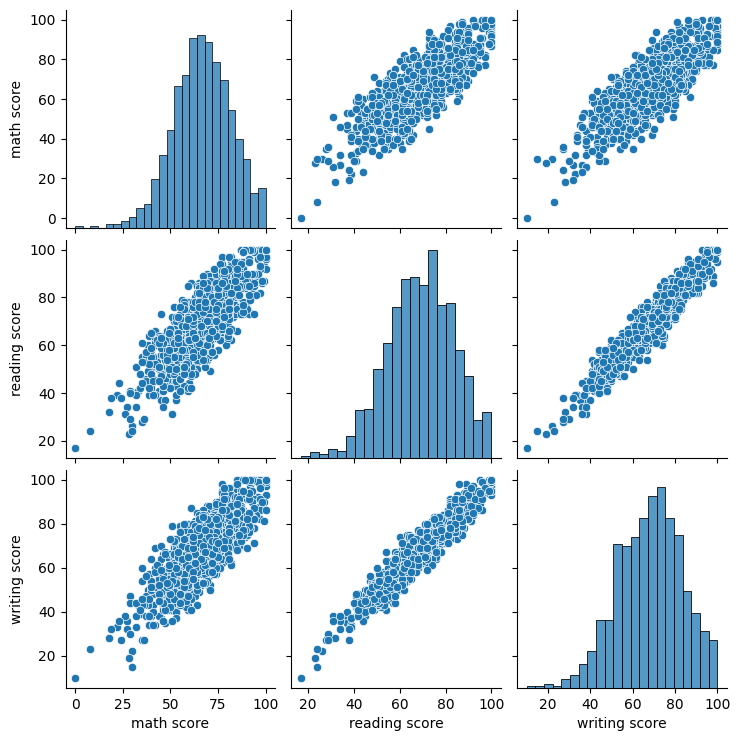

In [23]:
sns.pairplot(df)

In [24]:
df['math_pass_status'] = np.where(df['math score']>=50,'P','F')
df['math_pass_status'].value_counts()

math_pass_status
P    865
F    135
Name: count, dtype: int64

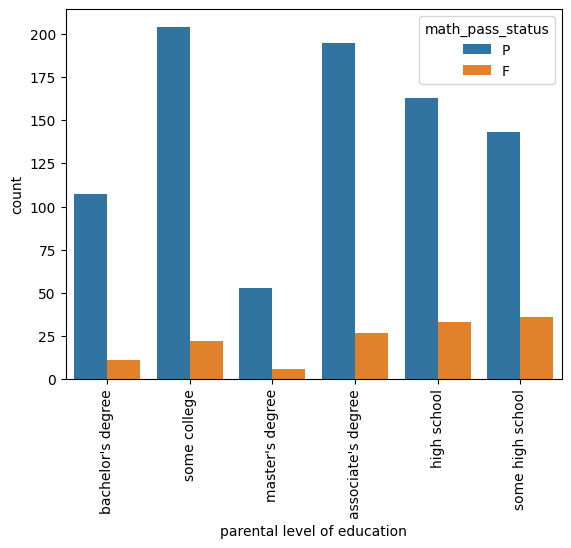

In [25]:
p=sns.countplot(x='parental level of education',data=df,hue='math_pass_status')
_ = plt.setp(p.get_xticklabels(), rotation=90) 
# print(df['parental level of education'].value_counts() )

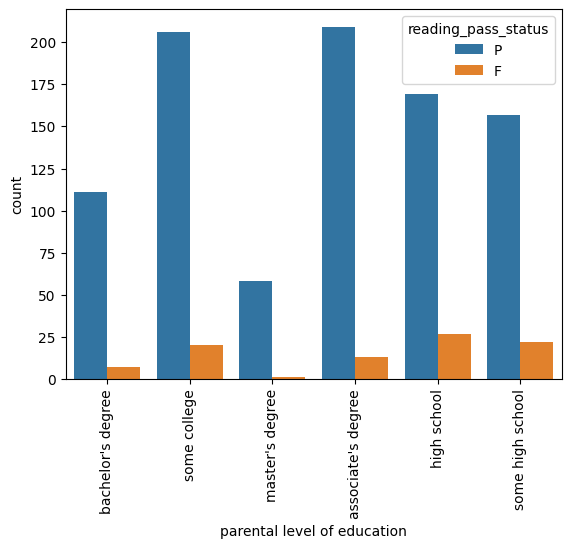

In [26]:
df['reading_pass_status'] = np.where(df['reading score']>=50,'P','F')
df['reading_pass_status'].value_counts()
p=sns.countplot(x='parental level of education',data=df,hue='reading_pass_status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

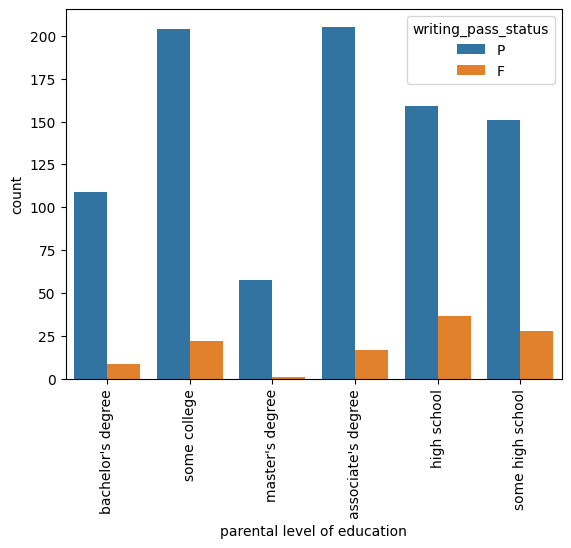

In [27]:
df['writing_pass_status'] = np.where(df['writing score']>=50,'P','F')
df['writing_pass_status'].value_counts()
p=sns.countplot(x='parental level of education',data=df,hue='writing_pass_status')
_= plt.setp(p.get_xticklabels(),rotation=90)

In [28]:
df['total'] = df['math score']+df['reading score']+df['writing score']
df['percentage'] = (df['total']/3) .round(2)
df 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,total,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,218,72.67
1,female,group C,some college,standard,completed,69,90,88,P,P,P,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,148,49.33
4,male,group C,some college,standard,none,76,78,75,P,P,P,229,76.33
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P,232,77.33
6,female,group B,some college,standard,completed,88,95,92,P,P,P,275,91.67
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F,122,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P,195,65.00
9,female,group B,high school,free/reduced,none,38,60,50,F,P,P,148,49.33


In [29]:

df['allpass'] = df.apply(lambda x: 'P' if x['math score']>=50 and x['reading score']>=50 and x['writing score']>=50 else'F',axis=1)
df['allpass'].value_counts()


allpass
P    812
F    188
Name: count, dtype: int64

In [30]:
def grade(percentage,allpass):
    if allpass=='F':
        return 'F'
    if percentage>=80:
        return 'A'
    elif percentage>=70:
        return 'B'
    elif percentage>=60:
        return 'C'
    elif percentage>=50:
        return 'D'
    else:
        return 'F'
df['grade'] = df.apply(lambda x:grade(x['percentage'],x['allpass']),axis=1)

In [31]:
df.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,total,percentage,allpass,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,218,72.67,P,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,247,82.33,P,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,278,92.67,P,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,148,49.33,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,229,76.33,P,B
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P,232,77.33,P,B
6,female,group B,some college,standard,completed,88,95,92,P,P,P,275,91.67,P,A
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F,122,40.67,F,F
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P,195,65.00,P,C
9,female,group B,high school,free/reduced,none,38,60,50,F,P,P,148,49.33,F,F


In [32]:
gradegroup = df.groupby('gender').aggregate({'grade':'value_counts'})
gradegroup

grade
gender grade       
female B        150
       C        125
       A        118
       F         89
       D         36
male   C        130
       B        111
       F         99
       A         80
       D         62

In [33]:
read = df[df['math score']==100]['percentage'].count()
print(read)

7


<Axes: xlabel='percentage', ylabel='Count'>

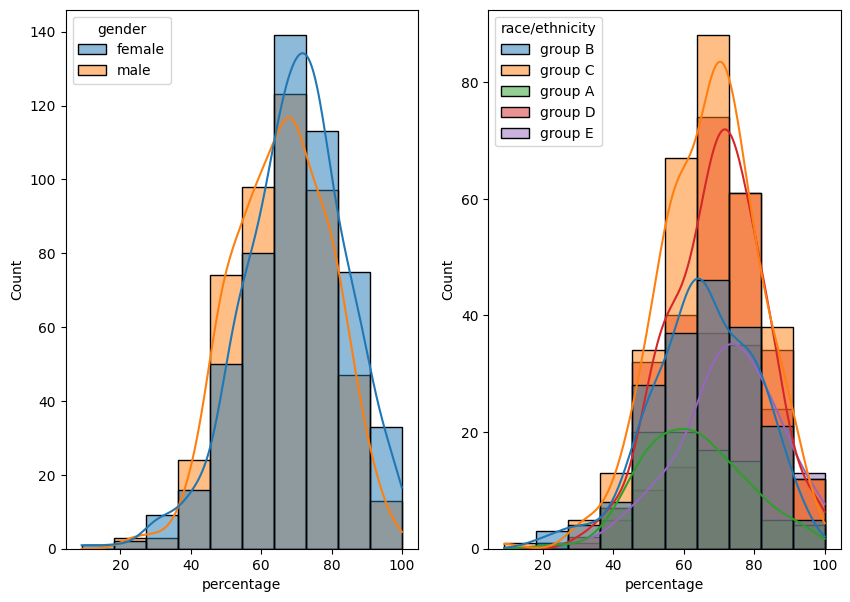

In [34]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
sns.histplot(data=df,x='percentage',bins=10,kde=True,hue ='gender',ax=ax[0])
sns.histplot(data=df,x='percentage',bins=10,kde=True,ax=ax[1],hue='race/ethnicity')

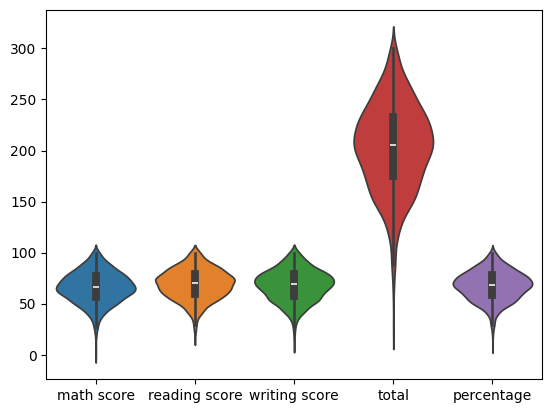

In [35]:
histviolion = sns.violinplot(data = df)

grade
B    261
C    255
A    198
F    188
D     98
Name: count, dtype: int64

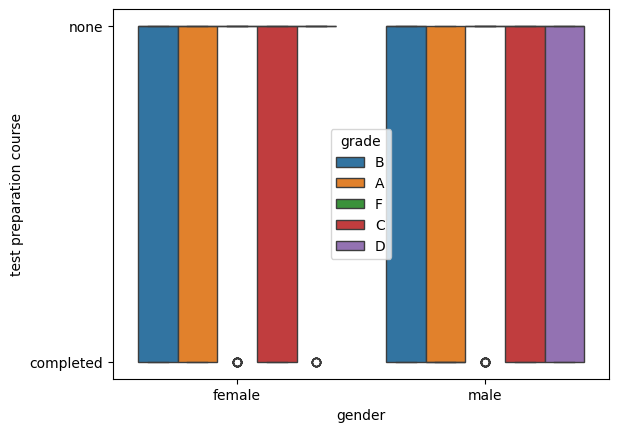

In [36]:
sns.boxplot(x='gender',data=df,y='test preparation course',hue='grade')
df['grade'].value_counts()

In [37]:
df.describe(include='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_pass_status,reading_pass_status,writing_pass_status,allpass,grade
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,5,6,2,2,2,2,2,2,5
top,female,group C,some college,standard,none,P,P,P,P,B
freq,518,319,226,645,642,865,910,886,812,261


([<matplotlib.patches.Wedge at 0x299694c33a0>,
 [Text(-0.7170170875213356, 0.8341981156790162, 'some college'),
  Text(-0.939705183863221, -0.5717990621018804, "associate's degree"),
  Text(0.3135211646298752, -1.0543739750814827, 'high school'),
  Text(1.0940938905900084, -0.11383566476996167, 'some high school'),
  Text(0.7428660925790179, 0.8112644257554883, "bachelor's degree"),
  Text(0.20272389463327073, 1.0811581857178525, "master's degree")],
 [Text(-0.39110022955709217, 0.4550171540067361, '22.6%'),
  Text(-0.5125664639253932, -0.3118903975101165, '22.2%'),
  Text(0.17101154434356827, -0.5751130773171723, '19.6%'),
  Text(0.5967784857763682, -0.06209218078361545, '17.9%'),
  Text(0.40519968686128244, 0.4425078685939027, '11.8%'),
  Text(0.11057666979996585, 0.5897226467551923, '5.9%')])

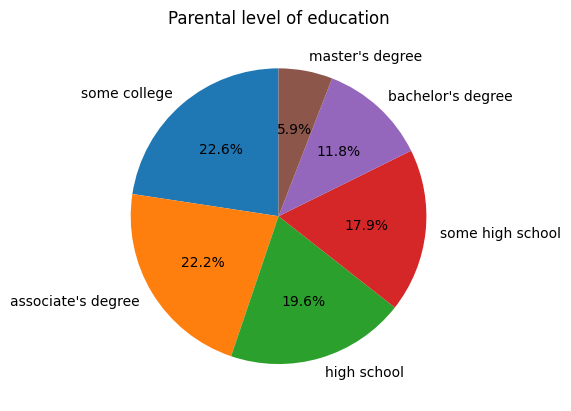

In [38]:
plt.title("Parental level of education")
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,autopct='%1.1f%%',startangle=90)

In [39]:
encoded_df = pd.get_dummies(df,drop_first=True)
encoded_df.head(30)

,math score,reading score,writing score,total,percentage,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math_pass_status_P,reading_pass_status_P,writing_pass_status_P,allpass_P,grade_B,grade_C,grade_D,grade_F
0,72,72,74,218,72.67,False,True,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False,False,False
1,69,90,88,247,82.33,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,True,False,False,False,False
2,90,95,93,278,92.67,False,True,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,False,False,False
3,47,57,44,148,49.33,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
4,76,78,75,229,76.33,True,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,False,False,False
5,71,83,78,232,77.33,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False
6,88,95,92,275,91.67,False,True,False,False,False,False,False,False,True,False,True,False,True,True,True,True,False,False,False,False
7,40,43,39,122,40.67,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
8,64,64,67,195,65.00,True,False,False,True,False,False,True,False,False,False,False,False,True,True,True,True,False,True,False,False
9,38,60,50,148,49.33,False,True,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,False,True


<Axes: >

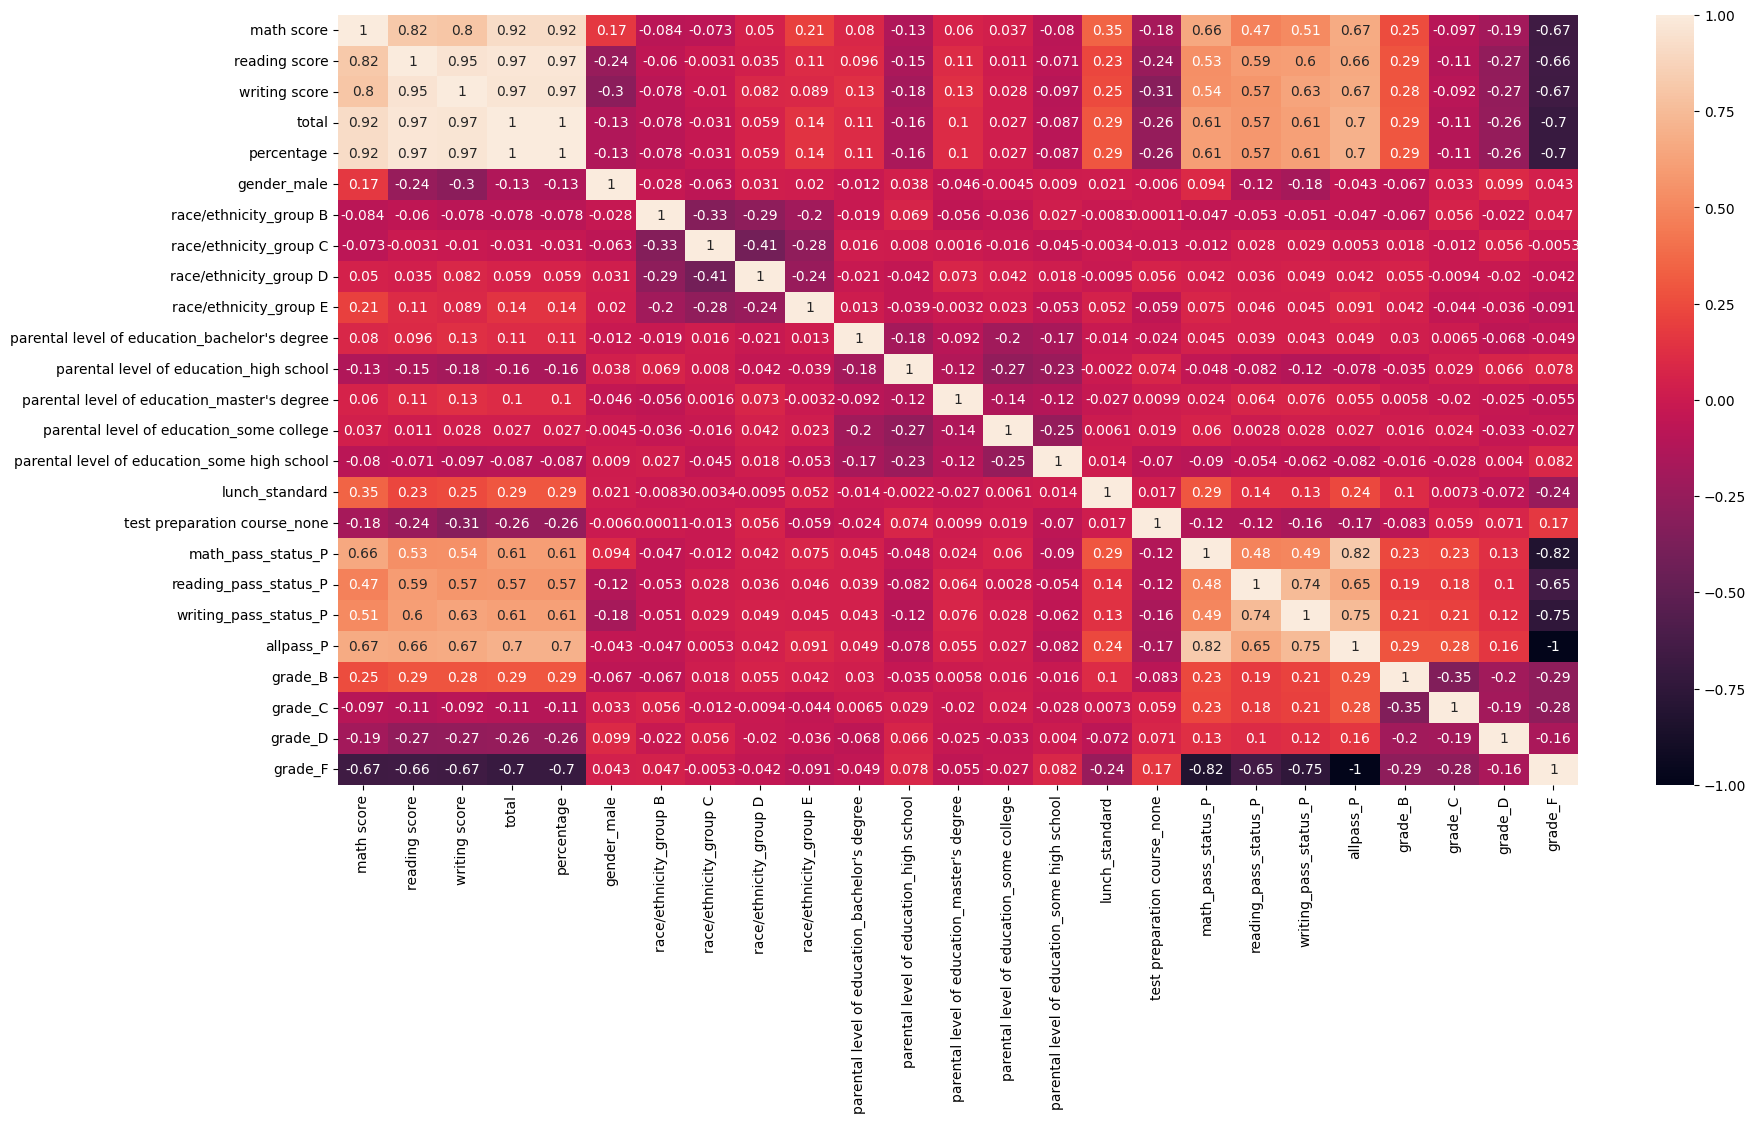

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(encoded_df.corr(),annot=True)

In [41]:
df.groupby(df['race/ethnicity']).aggregate({'grade':'value_counts'})

grade
race/ethnicity grade       
group A        F         30
               C         24
               B         14
               A         11
               D         10
group B        C         58
               F         43
               B         38
               A         35
               D         16
group C        B         87
               C         79
               F         59
               A         55
               D         39
group D        B         79
               C         65
               A         53
               F         42
               D         23
group E        A         44
               B         43
               C         29
               F         14
               D         10

In [42]:
df.sort_values(by='total',ascending=False).head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,total,percentage,allpass,grade
916,male,group E,bachelor's degree,standard,completed,100,100,100,P,P,P,300,100.00,P,A
458,female,group E,bachelor's degree,standard,none,100,100,100,P,P,P,300,100.00,P,A
962,female,group E,associate's degree,standard,none,100,100,100,P,P,P,300,100.00,P,A
114,female,group E,bachelor's degree,standard,completed,99,100,100,P,P,P,299,99.67,P,A
179,female,group D,some high school,standard,completed,97,100,100,P,P,P,297,99.00,P,A
712,female,group D,some college,standard,none,98,100,99,P,P,P,297,99.00,P,A
165,female,group C,bachelor's degree,standard,completed,96,100,100,P,P,P,296,98.67,P,A
625,male,group D,some college,standard,completed,100,97,99,P,P,P,296,98.67,P,A
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,P,P,P,293,97.67,P,A
149,male,group E,associate's degree,free/reduced,completed,100,100,93,P,P,P,293,97.67,P,A


In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,total,percentage,allpass,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,218,72.67,P,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,247,82.33,P,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,278,92.67,P,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,148,49.33,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,229,76.33,P,B


In [44]:
X = df.drop("reading score", axis=1)
y = df["reading score"]

In [45]:
X.head()
y.head()


0    72
1    90
2    95
3    57
4    78
Name: reading score, dtype: int64

In [46]:
numerical_columns = X.select_dtypes(exclude='object').columns
# num_columns = [columns for columns in df.columns if df[columns].dtype!='O']
# print(num_columns)

cat_columns = X.select_dtypes(include='object').columns
print(numerical_columns.to_list())
print(cat_columns.tolist())

['math score', 'writing score', 'total', 'percentage']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math_pass_status', 'reading_pass_status', 'writing_pass_status', 'allpass', 'grade']


In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
cat_transform = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", cat_transform, cat_columns),
    ("StandardScaler", numeric_transform, numerical_columns)
])

In [48]:
X = preprocessor.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((750, 34), (750,), (250, 34), (250,))

In [50]:
# Evaluation Function
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate(Truth,Predicted):
    rmse = np.sqrt(mean_squared_error(Truth,Predicted))
    mae = mean_absolute_error(Truth,Predicted)
    mse  = mean_squared_error(Truth,Predicted)
    r2Score = r2_score(Truth,Predicted)
    return mae,mse,rmse,r2Score

In [51]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models  ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNearestNeighbors":KNeighborsRegressor(),
    "RandomForest Regressor":RandomForestRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "XGB Regressor":XGBRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor(),
    
}

In [52]:
model_list = []
score_list = []
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(xtrain,ytrain)

    ytrainprediction = model.predict(xtrain)
    ytestprediction = model.predict(xtest)

    modeltrain_rmse,modeltrain_mae,modeltrain_mse,modeltrain_r2 = evaluate(ytrain,ytrainprediction)
    modeltest_rmse,modeltest_mae,modeltest_mse,modeltest_r2 = evaluate(ytest,ytestprediction)

    print(f"Model: {list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])

    print(f"Model's Training Accuracy")
    print(f"Training R2Score : {modeltrain_r2}")
    print(f"Training RMSE : {modeltrain_rmse}")
    print(f"Training MAE : {modeltrain_mae}")
    print(f"Training MSE : {modeltrain_mse}")

    print("-------------------------------------------------------------")
    print(f"Model's Testing Accuracy")
    print(f"Testing R2Score : {modeltest_r2}")
    print(f"Testing RMSE : {modeltest_rmse}")
    print(f"Testing MAE : {modeltest_mae}")
    print(f"Testing MSE : {modeltest_mse}")
    print("-------------------------------------------------------------")
    
    print("\n")
    score_list.append(modeltest_r2)




Model: Linear Regression
Model's Training Accuracy
Training R2Score : 1.0
Training RMSE : 1.8379372098327923e-14
Training MAE : 6.570054344496704e-28
Training MSE : 2.5632117244770678e-14
-------------------------------------------------------------
Model's Testing Accuracy
Testing R2Score : 1.0
Testing RMSE : 1.935518412210513e-14
Testing MAE : 6.258380659916584e-28
Testing MSE : 2.5016755704760328e-14
-------------------------------------------------------------


Model: Lasso
Model's Training Accuracy
Training R2Score : 0.939257586297896
Training RMSE : 2.834698597835549
Training MAE : 12.375643169689676
Training MSE : 3.5179032348388546
-------------------------------------------------------------
Model's Testing Accuracy
Testing R2Score : 0.9433141684962255
Testing RMSE : 2.9692464827870997
Testing MAE : 13.400484311853774
Testing MSE : 3.660667194905018
-------------------------------------------------------------


Model: Ridge
Model's Training Accuracy
Training R2Score : 0.9988

Model: KNearestNeighbors
Model's Training Accuracy
Training R2Score : 0.952193124823304
Training RMSE : 2.4495999999999998
Training MAE : 9.740160000000001
Training MSE : 3.120922940413621
-------------------------------------------------------------
Model's Testing Accuracy
Testing R2Score : 0.9295104165841791
Testing RMSE : 3.1424000000000007
Testing MAE : 16.66368
Testing MSE : 4.082117097781493
-------------------------------------------------------------


Model: RandomForest Regressor
Model's Training Accuracy
Training R2Score : 0.9959079898013675
Training RMSE : 0.7074933333333331
Training MAE : 0.8337050666666664
Training MSE : 0.9130745132061602
-------------------------------------------------------------
Model's Testing Accuracy
Testing R2Score : 0.9722463915103869
Testing RMSE : 1.9354399999999996
Testing MAE : 6.560930399999998
Testing MSE : 2.5614313186185567
-------------------------------------------------------------


Model: Decision Tree Regressor
Model's Training Ac

In [53]:
# d = {
#     1:23,
#     2:34,
#     3:45,
#     4:56
# }
# print(list(d.values())[0])

In [61]:
scorecomparison_df = pd.DataFrame(
    list(zip(model_list,score_list)),
    columns=['Model','Score']).sort_values(by='Score',ascending=False)

In [62]:
scorecomparison_df

,Model,Score
0,Linear Regression,1.000000
2,Ridge,0.998879
6,XGB Regressor,0.976603
7,Cat Boost Regressor,0.974491
4,RandomForest Regressor,0.972246
5,Decision Tree Regressor,0.954771
8,AdaBoost Regressor,0.954095
1,Lasso,0.943314
3,KNearestNeighbors,0.929510


In [80]:
rdg = Ridge()
rdg.fit(xtrain,ytrain)
pred = rdg.predict(xtest)
print(pred[90])

80.13299182550361


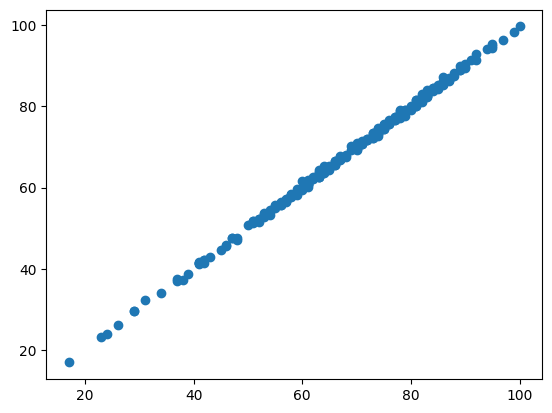

In [81]:
plt.scatter(ytest,pred)

In [82]:
pred_df = pd.DataFrame({'Actual':ytest,'Predicted':pred})
pred_df.head(10)

,Actual,Predicted
521,86,86.186426
737,66,66.615309
740,73,72.961830
660,77,76.876098
411,83,82.573608
678,75,75.619640
626,70,69.268858
513,61,60.984731
859,73,73.523555
136,54,53.140174
